In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

51.38209013433388 -51.45631585864166
49.05628050630017 96.33318883318987
-1.6727909701093893 -80.80235697231676
-83.1412003991843 -170.46922739685598
-48.44606080293586 26.040572812273638
34.07096941200827 21.038947732038793
-63.69792698351677 -110.6781346897301
-88.14504261004684 -162.60106557552666
53.72082700786251 127.95159672544503
62.197929281722 89.46138800544361
-41.378443976764125 -107.98525146841868
56.016870678065146 155.12554024956484
3.5753951918390356 58.714529956844416
36.72917107146638 81.21537818170236
13.094686185952682 123.3536080058903
76.38533996925526 -46.3645688760752
55.553970809377034 37.491977636659726
65.52693033234272 56.56024911608287
19.224782267326034 -127.11266238074366
-7.420260413717983 49.769118623980546
34.925829993284665 78.07861518706608
-75.98844464447899 -44.8079277867229
82.09000471281718 99.84467540797027
41.7571484168831 -72.05315068361104
-3.389270571469609 163.6684924247071
-50.12809115053682 -103.45425235383172
77.45972805449532 -154.911624

56.54401305496643 179.8255898563848
65.51846466148953 178.62872800421485
78.84306199354833 81.15991976134887
-64.71767782598627 -106.41954731931617
69.80367644893326 72.19827194949485
30.75176276021439 -127.27303854117383
28.307732598004293 155.11004488280275
-21.577766866676015 170.11858650387086
-3.7895592814874846 -107.2896130862524
79.90190677315394 162.39629822898564
-58.47803574589575 90.60370506688696
-77.68271442595905 -122.26645145038471
-88.21509629323393 92.66710809851429
-44.303327880744206 91.99605199268518
66.82288608697323 -150.7543656541571
-37.47157593031857 -73.75628595306485
-18.426277874666084 23.85372578644757
12.631208178531082 -111.8304082278648
25.06314497775486 5.542620988212377
-46.18988058665515 66.20376890761699
-49.89659959958015 -134.48481715466465
5.995492060758579 -24.845900199324547
-32.82323366505409 177.40959420050513
66.36367569522676 -8.878692721985743
-7.091882948122446 -6.478383933241645
-3.3645963734226996 42.85861387099263
-82.93374906162617 97.

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

630

In [6]:
import requests
from config import weather_api_key
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bonavista
Processing Record 2 of Set 1 | erzin
Processing Record 3 of Set 1 | pajan
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | kruisfontein
Processing Record 6 of Set 1 | tukrah
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | zeya
Processing Record 10 of Set 1 | teya
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | sobolevo
Processing Record 13 of Set 1 | victoria
Processing Record 14 of Set 1 | shache
Processing Record 15 of Set 1 | maonon
Processing Record 16 of Set 1 | ilulissat
Processing Record 17 of Set 1 | kommunarka
Processing Record 18 of Set 1 | puteyets
Processing Record 19 of Set 1 | guerrero negro
Processing Record 20 of Set 1 | ambilobe
Processing Record 21 of Set 1 | leh
Processing Record 22 of Set 1 | ushuaia
Processing Record 23 of Set 1 | khatanga
Processing Record 2

Processing Record 41 of Set 4 | waitati
Processing Record 42 of Set 4 | riohacha
Processing Record 43 of Set 4 | inirida
Processing Record 44 of Set 4 | evensk
Processing Record 45 of Set 4 | bukama
Processing Record 46 of Set 4 | touros
Processing Record 47 of Set 4 | clyde river
Processing Record 48 of Set 4 | north fort myers
Processing Record 49 of Set 4 | neyshabur
Processing Record 50 of Set 4 | mayumba
Processing Record 1 of Set 5 | viareggio
Processing Record 2 of Set 5 | dawei
Processing Record 3 of Set 5 | kikwit
Processing Record 4 of Set 5 | la asuncion
Processing Record 5 of Set 5 | port hardy
Processing Record 6 of Set 5 | sola
Processing Record 7 of Set 5 | kamenka
Processing Record 8 of Set 5 | olafsvik
Processing Record 9 of Set 5 | pisco
Processing Record 10 of Set 5 | saldanha
Processing Record 11 of Set 5 | half moon bay
Processing Record 12 of Set 5 | ponta delgada
Processing Record 13 of Set 5 | lodja
Processing Record 14 of Set 5 | maracacume
Processing Record 15

Processing Record 34 of Set 8 | puerto ayacucho
Processing Record 35 of Set 8 | grand-santi
Processing Record 36 of Set 8 | geraldton
Processing Record 37 of Set 8 | tiksi
Processing Record 38 of Set 8 | esmeraldas
Processing Record 39 of Set 8 | slonim
Processing Record 40 of Set 8 | naftah
City not found. Skipping...
Processing Record 41 of Set 8 | salinopolis
Processing Record 42 of Set 8 | peniche
Processing Record 43 of Set 8 | the valley
Processing Record 44 of Set 8 | rambha
Processing Record 45 of Set 8 | tres arroyos
Processing Record 46 of Set 8 | watertown
Processing Record 47 of Set 8 | zheleznogorsk-ilimskiy
Processing Record 48 of Set 8 | itumbiara
Processing Record 49 of Set 8 | beloha
Processing Record 50 of Set 8 | miracema do tocantins
Processing Record 1 of Set 9 | maiduguri
Processing Record 2 of Set 9 | winnemucca
Processing Record 3 of Set 9 | nkowakowa
Processing Record 4 of Set 9 | denpasar
Processing Record 5 of Set 9 | hot springs
Processing Record 6 of Set 9 

Processing Record 20 of Set 12 | visby
Processing Record 21 of Set 12 | columbus
Processing Record 22 of Set 12 | challans
Processing Record 23 of Set 12 | olavarria
Processing Record 24 of Set 12 | pueblo nuevo
Processing Record 25 of Set 12 | saint-denis
Processing Record 26 of Set 12 | neuquen
Processing Record 27 of Set 12 | north platte
Processing Record 28 of Set 12 | maple creek
Processing Record 29 of Set 12 | bocas del toro
Processing Record 30 of Set 12 | luis correia
Processing Record 31 of Set 12 | khammam
Processing Record 32 of Set 12 | store heddinge
Processing Record 33 of Set 12 | sterling
Processing Record 34 of Set 12 | west hartford
Processing Record 35 of Set 12 | olinda
Processing Record 36 of Set 12 | purulha
Processing Record 37 of Set 12 | barras
Processing Record 38 of Set 12 | waipawa
Processing Record 39 of Set 12 | port lincoln
Processing Record 40 of Set 12 | iwanai
Processing Record 41 of Set 12 | broome
Processing Record 42 of Set 12 | kontagora
Processi

In [9]:
len(city_data)

585

In [10]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bonavista,48.6499,-53.1147,55.15,75,90,12.19,CA,2022-07-14 21:05:40
1,Erzin,36.9559,36.2000,74.98,84,1,0.85,TR,2022-07-14 21:09:18
2,Pajan,-1.5667,-80.4167,83.55,59,65,3.13,EC,2022-07-14 21:09:19
3,Vaini,-21.2000,-175.2000,78.96,94,46,8.05,TO,2022-07-14 21:09:05
4,Kruisfontein,-34.0033,24.7314,52.59,89,41,5.86,ZA,2022-07-14 21:04:29
5,Tukrah,32.5341,20.5791,76.73,55,0,9.31,LY,2022-07-14 21:09:20
6,Punta Arenas,-53.1500,-70.9167,33.91,93,75,2.30,CL,2022-07-14 21:04:39
7,Mataura,-46.1927,168.8643,37.47,99,100,2.80,NZ,2022-07-14 21:06:26
8,Zeya,53.7500,127.2667,65.89,83,90,3.42,RU,2022-07-14 21:09:20
9,Teya,60.3778,92.6267,47.64,86,100,3.11,RU,2022-07-14 21:09:21


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bonavista,CA,2022-07-14 21:05:40,48.6499,-53.1147,55.15,75,90,12.19
1,Erzin,TR,2022-07-14 21:09:18,36.9559,36.2000,74.98,84,1,0.85
2,Pajan,EC,2022-07-14 21:09:19,-1.5667,-80.4167,83.55,59,65,3.13
3,Vaini,TO,2022-07-14 21:09:05,-21.2000,-175.2000,78.96,94,46,8.05
4,Kruisfontein,ZA,2022-07-14 21:04:29,-34.0033,24.7314,52.59,89,41,5.86
5,Tukrah,LY,2022-07-14 21:09:20,32.5341,20.5791,76.73,55,0,9.31
6,Punta Arenas,CL,2022-07-14 21:04:39,-53.1500,-70.9167,33.91,93,75,2.30
7,Mataura,NZ,2022-07-14 21:06:26,-46.1927,168.8643,37.47,99,100,2.80
8,Zeya,RU,2022-07-14 21:09:20,53.7500,127.2667,65.89,83,90,3.42
9,Teya,RU,2022-07-14 21:09:21,60.3778,92.6267,47.64,86,100,3.11


In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

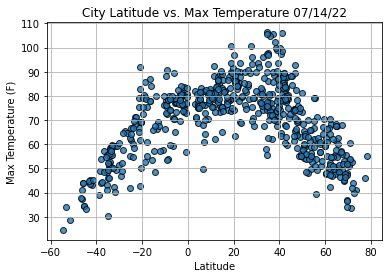

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

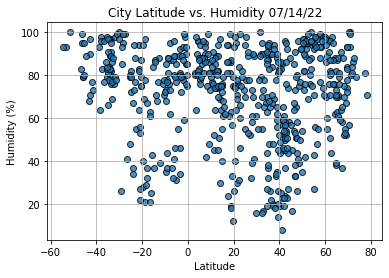

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

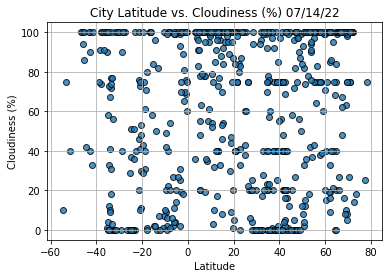

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

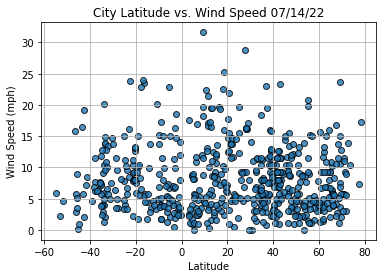

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [27]:
from scipy.stats import linregress

In [28]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
# Text coordinates is where the equation gets printed
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [29]:
index13 = city_data_df.loc[13]
index13

City                       Shache
Country                        CN
Date          2022-07-14 21:09:22
Lat                       38.4167
Lng                       77.2406
Max Temp                    72.52
Humidity                       33
Cloudiness                    100
Wind Speed                   5.61
Name: 13, dtype: object

In [30]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bonavista,CA,2022-07-14 21:05:40,48.6499,-53.1147,55.15,75,90,12.19
1,Erzin,TR,2022-07-14 21:09:18,36.9559,36.2000,74.98,84,1,0.85
5,Tukrah,LY,2022-07-14 21:09:20,32.5341,20.5791,76.73,55,0,9.31
8,Zeya,RU,2022-07-14 21:09:20,53.7500,127.2667,65.89,83,90,3.42
9,Teya,RU,2022-07-14 21:09:21,60.3778,92.6267,47.64,86,100,3.11


In [44]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bonavista,CA,2022-07-14 21:05:40,48.6499,-53.1147,55.15,75,90,12.19
1,Erzin,TR,2022-07-14 21:09:18,36.9559,36.2000,74.98,84,1,0.85
5,Tukrah,LY,2022-07-14 21:09:20,32.5341,20.5791,76.73,55,0,9.31
8,Zeya,RU,2022-07-14 21:09:20,53.7500,127.2667,65.89,83,90,3.42
9,Teya,RU,2022-07-14 21:09:21,60.3778,92.6267,47.64,86,100,3.11


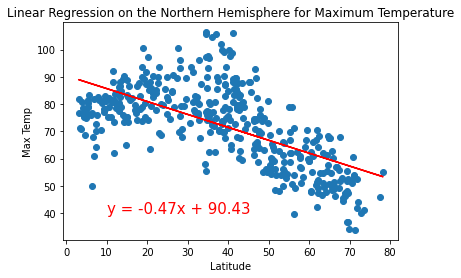

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

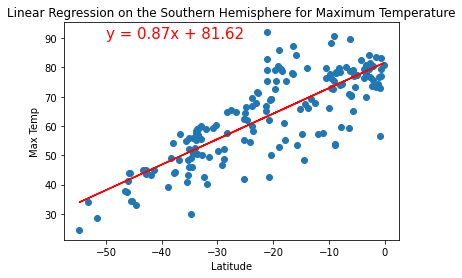

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

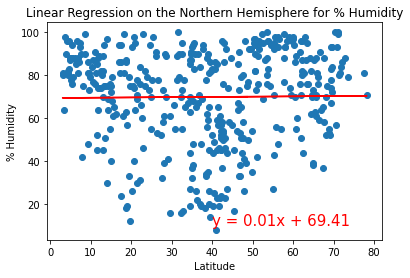

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

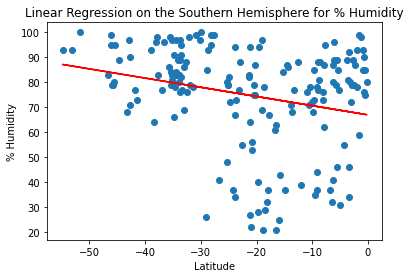

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

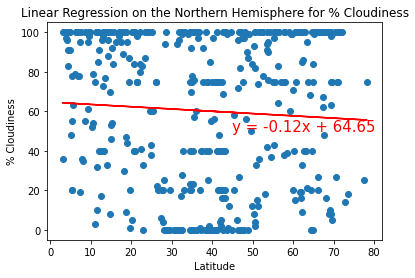

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(45,50))

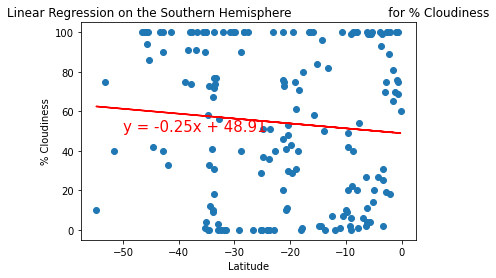

In [47]:
# Linear regression on the Southern Hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,50))
